In [1]:
import numpy as np
import matplotlib.pyplot as plt

goal: generate 7s signal, 3s for sound of the dial one sound, 1s for silent, 3 more second for the dial of second sound.

In [77]:
fs = 4000
T1 = 3 
T2 = 1

t1 = np.arange(0, T1, 1/fs)
t2 = np.arange(0, T2, 1/fs)

x1 = np.sin(np.pi*2*t1*697) + np.sin(np.pi*2*t1*1209)
x2 = np.sin(np.pi*2*t1*697) + np.sin(np.pi*2*t1*1336)

x = np.concatenate((x1, np.zeros(len(t2)), x2), axis=0)

In [78]:
from IPython.display import Audio
Audio(x, rate=fs)

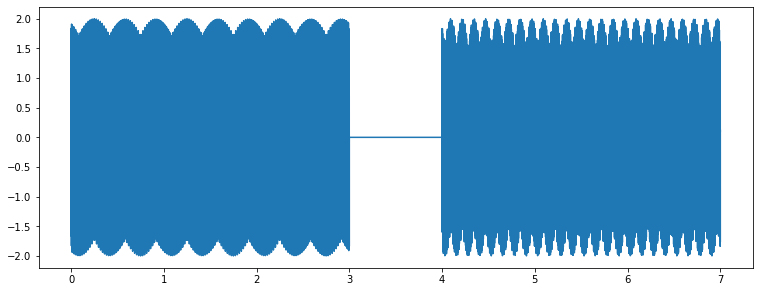

In [79]:
T = 7
t = np.arange(0, 7, 1/fs)
plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t, x)
plt.show()

In [80]:
from scipy.fftpack import fft, fftshift, fftfreq

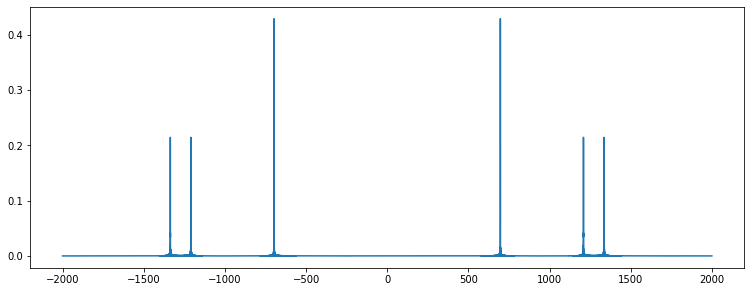

In [81]:
xk = fftshift(fft(x))
f = fftshift(fftfreq(len(x), 1/fs))
plt.figure(figsize=(6.4*2, 4.8))
plt.plot(f, abs(xk)/len(xk))
plt.show()

In [87]:
len(x)

28000

In [96]:
128-len(x)%128

32

In [97]:
28032/128

219.0

In [100]:
from scipy.signal import stft
f, t, Zxx = stft(x, fs=fs, window='hann', nperseg=256, noverlap=256*0.5, nfft=256, boundary='zeros', padded=True)

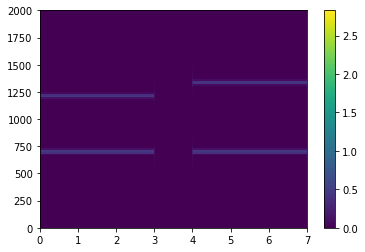

In [101]:
amp = 2 * np.sqrt(2)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.colorbar()
plt.show()

In [104]:
print("delta t = {}".format(t[1]-t[0])) 
print("delta f = {}".format(f[1]-f[0]))

delta t = 0.032
delta f = 15.625


In [106]:
128*1/fs

0.032

In [107]:
fs/256

15.625